In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/interim/dataset.csv')
df.head()

,year,GEO,Compensation of employees per hour worked (Euro),Compensation per employee (Euro),education,population,rd_expenditure
0,2010,Belgium,34.3,49054.8,48.457143,10839905,2.06
1,2011,Belgium,35.1,50593.5,47.857143,11000638,2.17
2,2012,Belgium,36.2,52178.2,48.242857,11075889,2.28
3,2013,Belgium,37.2,53452.5,49.242857,11137974,2.33
4,2014,Belgium,37.6,53965.2,50.285714,11180840,2.37


In [3]:
scaler = StandardScaler()
df['per_hour_worked'] = scaler.fit_transform(df[['Compensation of employees per hour worked (Euro)']])
df['per_employee'] = scaler.fit_transform(df[['Compensation per employee (Euro)']])
df['education'] = scaler.fit_transform(df[['education']])
df['population'] = scaler.fit_transform(df[['population']])
df['rd_expenditure'] = scaler.fit_transform(df[['rd_expenditure']])
df[['per_hour_worked', 'per_employee', 'education', 'population', 'rd_expenditure']].corr()

,per_hour_worked,per_employee,education,population,rd_expenditure
per_hour_worked,1.000000,0.990948,0.307323,0.112138,0.580168
per_employee,0.990948,1.000000,0.306327,0.107771,0.575635
education,0.307323,0.306327,1.000000,-0.011982,0.480950
population,0.112138,0.107771,-0.011982,1.000000,0.214731
rd_expenditure,0.580168,0.575635,0.480950,0.214731,1.000000


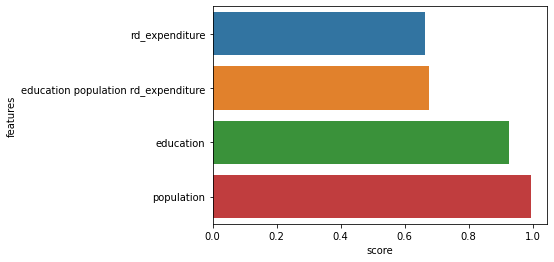

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

def train(features):
    data = df.dropna()
    x = data[features]
    y = data[['per_hour_worked']]
    score_on_train = []
    score_on_test = []
    kfold = KFold(n_splits=2, shuffle=True, random_state=42)
    for train_index, test_index in kfold.split(x):
        x_train, x_test = x.iloc[train_index], x.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model = LinearRegression()
        model.fit(x_train, y_train)
        score_on_train.append(mean_squared_error(y_train, model.predict(x_train)))
        score_on_test.append(mean_squared_error(y_test, model.predict(x_test)))

    return np.mean(score_on_test)

features = [
    ['education'],
    ['population'],
    ['rd_expenditure'],
    ['education', 'population', 'rd_expenditure']
]
scores = [train(f) for f in features]
result = pd.DataFrame({
    'features': [' '.join(f) for f in features],
    'score': scores
}).sort_values(by='score')
sns.barplot(data=result, x='score', y='features')

['education', 'population', 'rd_expenditure']
[[0.06637092 0.02533453 0.55678467]]


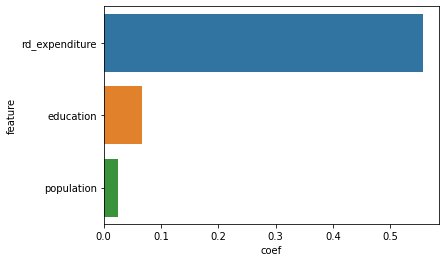

In [5]:
features = ['education', 'population', 'rd_expenditure']
data = df.dropna()
x = data[features]
y = data[['per_hour_worked']]

model = LinearRegression()
model.fit(x, y)

print(features)
print(model.coef_)

result = pd.DataFrame({
    'feature': features,
    'coef': model.coef_[0]
}).sort_values(by=['coef'], ascending=False)
sns.barplot(data=result, y='feature', x='coef')